<a href="https://colab.research.google.com/github/juhi9697/Python-programs/blob/master/Spin_flip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [ ]:
player_register= QuantumRegister(1,'p')
computer_register= QuantumRegister(1,'c')
classical_register= ClassicalRegister(1,'a')
circuit_spin_flip = QuantumCircuit(player_register,computer_register,classical_register)

#First computer does its move 
circuit_spin_flip.h(computer_register[0])

#Player decides if he/she want to flip the coin or not
choice= input('enter your choice=')
print(choice)
#now player applies the gate based on the choice
if (choice=='yes'):
  circuit_spin_flip.x(player_register[0])
else:
  circuit_spin_flip.i(player_register[0])
circuit_spin_flip.cx(player_register[0],computer_register[0])

#Again computer applies its move
circuit_spin_flip.h(computer_register[0])

#measure the qubit
circuit_spin_flip.measure(computer_register[0],classical_register[0])
 

enter your choice=yes
yes


In [ ]:
circuit_spin_flip.draw()

┌───┐             
p_0: ┤ X ├──■──────────
     ├───┤┌─┴─┐┌───┐┌─┐
c_0: ┤ H ├┤ X ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
a: 1/════════════════╩═
                     0

{'0': 100}


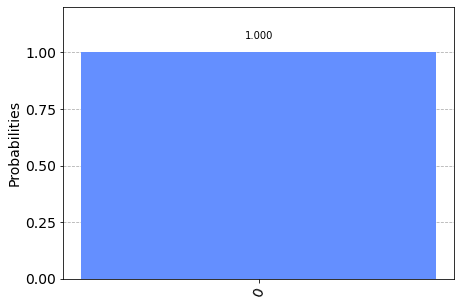

In [ ]:
# The execution of the circuit
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit_spin_flip,  backend=backend, shots=100)
result= job.result()
counts = result.get_counts(circuit_spin_flip)
print(counts)
plot_histogram(counts)

